In [64]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline


In [65]:

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load data
df = pd.read_csv(r"C:\Users\safreena\Downloads\Company_Data (1).csv")


In [66]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [67]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [68]:
df.info

<bound method DataFrame.info of      Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Ed

In [69]:
df.shape

(400, 11)

In [70]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [52]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'Sale'],
      dtype='object')

In [81]:
# Convert Sales to categorical variable
df["High_Sales"] = ["Yes" if x > 10 else "No" for x in df["Sales"]]

df["High_Sales"]

0       No
1      Yes
2      Yes
3       No
4       No
      ... 
395    Yes
396     No
397     No
398     No
399     No
Name: High_Sales, Length: 400, dtype: object

In [73]:
# Encode categorical variables
df = pd.get_dummies(df, columns=["ShelveLoc", "Urban", "US"])

In [74]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,High_Sales,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,No,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,Yes,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,Yes,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,No,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,No,1,0,0,0,1,1,0


In [75]:
# Split data into training and testing sets
X = df.drop(["Sales", "High_Sales"], axis=1)
y = df["High_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
X_train

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
18,110,110,0,408,68,46,17,0,1,0,1,0,0,1
202,121,78,4,413,130,46,10,1,0,0,1,0,0,1
250,137,105,10,435,156,72,14,0,1,0,0,1,0,1
274,135,93,2,67,119,34,11,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,148,51,16,148,150,58,17,0,0,1,1,0,0,1
106,102,33,0,217,139,70,18,0,0,1,1,0,1,0
270,119,26,0,284,89,26,10,0,1,0,0,1,1,0
348,132,102,20,459,107,49,11,0,1,0,0,1,0,1


In [77]:
# Build decision tree model
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [78]:
# Evaluate model performance
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label="Yes"))
print("Recall:", recall_score(y_test, y_pred, pos_label="Yes"))
print("F1 Score:", f1_score(y_test, y_pred, pos_label="Yes"))

Accuracy: 0.7625
Precision: 0.5
Recall: 0.5789473684210527
F1 Score: 0.5365853658536586


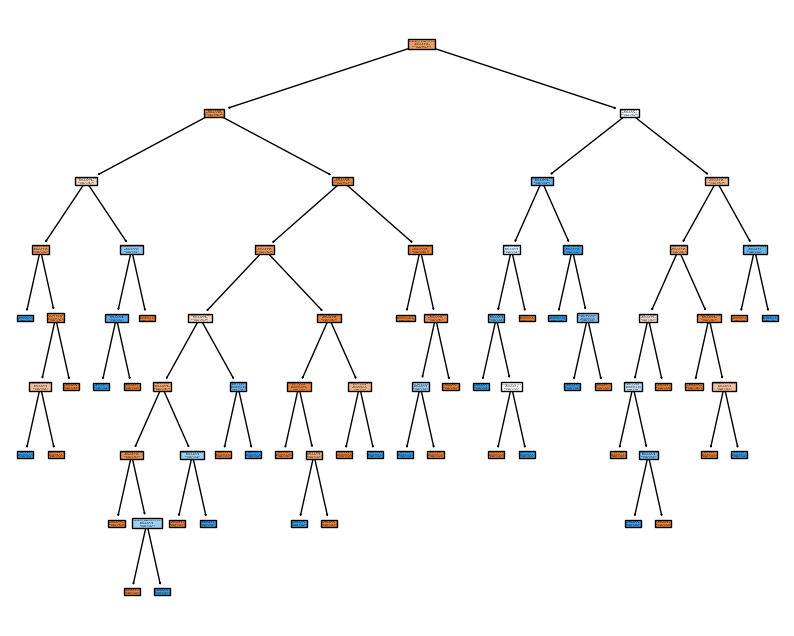

In [79]:
#visualize the decicion score 
plt.figure(figsize=(10,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Yes', 'No'])
plt.show()

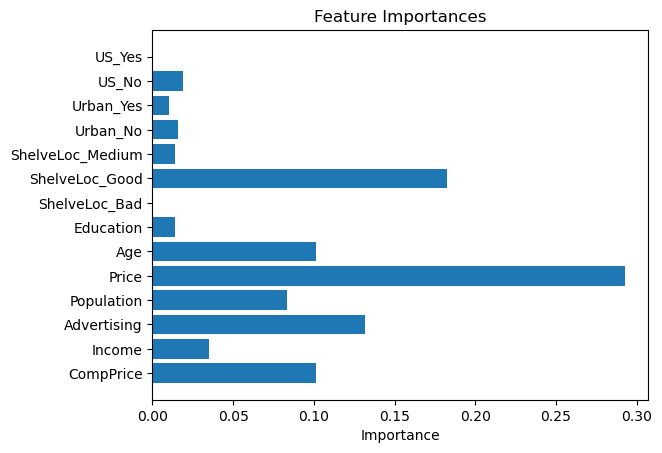

In [80]:
import matplotlib.pyplot as plt

# Get the feature importances
importances = clf.feature_importances_

# Create a horizontal bar chart
plt.barh(X.columns, importances)

# Add labels and title to the chart
plt.xlabel("Importance")
plt.title("Feature Importances")

# Display the chart
plt.show()
